# Лабораторная работа №5
Баранов Д.А. ИВТ 2.1

# Понимание бизнес-задачи

Анализ тональности текста (Sentiment Analysis) - задача автоматического определения эмоциональной окраски текста: положительная или отрицательная. Эта задача широко применяется:
- в маркетинге (анализ отзывов на товары/услуги)
- в СМИ (мониторинг общественного мнения)
- в службах поддержки (анализ пользовательских обращений)

Цель - классифицировать отзывы о фильмах как положительные или отрицательные с использованием RNN, LSTM и Bidirectional LSTM.

# Понимание данных

Используется датасет IMDB Movie Revies, доступный через **keras.datasets.imbd**. Он содержит:
- 50000 текстов отзывов
- метки: 0 (отрицательные), 1 (положительные)
- уже предобработан: тексты представлены как последовательности индексов слов (по частотности)

# Задание 2: Анализ тональности текста

1. Загрузка и предобработка данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, Bidirectional
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Параметры
max_features = 10000 # Размер словаря
maxlen = 500 # Максимальная длина последовательности
embedding_dims = 128 # Размерность векторного представления слов

# Загрузка данных
print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(f'Загружено {len(x_train)} обучающих последовательностей')
print(f'Загружено {len(x_test)} тестовых последовательностей')

# Приведение последовательностей к одинаковой длине
print('Приведение последовательностей к одинаковой длине...')
x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)
print(f'Форма обучающих данных: {x_train.shape}')
print(f'Форма тестовых данных: {x_test.shape}')

# Функция для оценки модели
def evaluate_model(model, x_test, y_test):
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f'Точность (Accuracy): {accuracy:.4f}')
  print(f'Точность (Precision): {precision:.4f}')
  print(f'Полнота (Recall): {recall:.4f}')
  print(f'F1-мера: {f1:.4f}')

  # Построение матрицы ошибок
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Матрица ошибок')
  plt.xlabel('Предсказанные метки')
  plt.ylabel('Истинные метки')
  plt.show()

  return accuracy, precision, recall, f1

Загрузка данных...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Загружено 25000 обучающих последовательностей
Загружено 25000 тестовых последовательностей
Приведение последовательностей к одинаковой длине...
Форма обучающих данных: (25000, 500)
Форма тестовых данных: (25000, 500)


2. Создание и обучение модели SimpleRNN

Обучение модели SimpleRNN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 - 193s - 247ms/step - accuracy: 0.5301 - loss: 0.6907 - val_accuracy: 0.5567 - val_loss: 0.6753
Epoch 2/10
782/782 - 220s - 281ms/step - accuracy: 0.6084 - loss: 0.6496 - val_accuracy: 0.5980 - val_loss: 0.6419
Epoch 3/10
782/782 - 309s - 395ms/step - accuracy: 0.6772 - loss: 0.5901 - val_accuracy: 0.6263 - val_loss: 0.6315
Epoch 4/10
782/782 - 286s - 366ms/step - accuracy: 0.7192 - loss: 0.5362 - val_accuracy: 0.6341 - val_loss: 0.6310
Epoch 5/10
782/782 - 272s - 347ms/step - accuracy: 0.7470 - loss: 0.4990 - val_accuracy: 0.6306 - val_loss: 0.6581
Epoch 6/10
782/782 - 206s - 263ms/step - accuracy: 0.7294 - loss: 0.5168 - val_accuracy: 0.6281 - val_loss: 0.6582
Epoch 7/10
782/782 - 220s - 281ms/step - accuracy: 0.7238 - loss: 0.5248 - val_accuracy: 0.6275 - val_loss: 0.6481
Epoch 8/10
782/782 - 201s - 256ms/step - accuracy: 0.7322 - loss: 0.5146 - val_accuracy: 0.6419 - val_loss: 0.6539
Epoch 9/10
782/782 - 189s - 242ms/step - accuracy: 0.7244 - loss: 0.5190 - val_accuracy: 0.

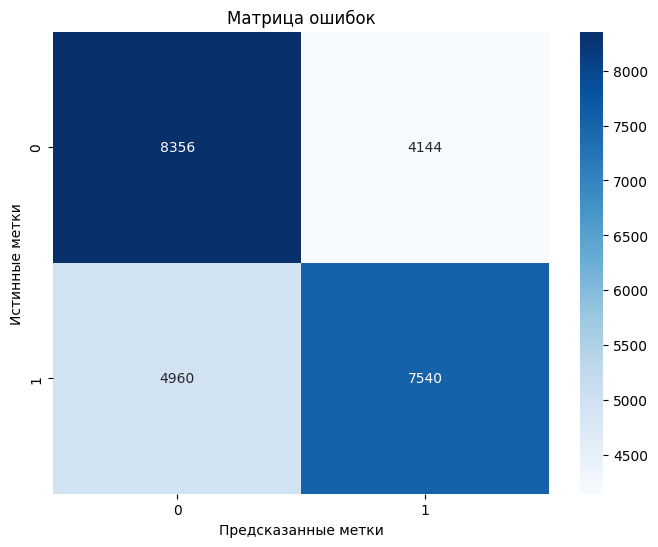

In [2]:
# Создание модели SimpleRNN
def create_simple_rnn_model():
  model = Sequential()
  model.add(Embedding(max_features, embedding_dims, input_length = maxlen))
  model.add(SimpleRNN(units=64, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Обучение модели SimpleRNN
print('Обучение модели SimpleRNN')
simple_rnn_model = create_simple_rnn_model()
simple_rnn_history = simple_rnn_model.fit(x_train, y_train,
                                          batch_size = 32, epochs = 10,
                                          validation_data = (x_test, y_test),
                                          verbose = 2)
# Оценки модели
print('\nОценка модели SimpleRNN:')
simple_rnn_metrics = evaluate_model(simple_rnn_model, x_test, y_test)

3. Создание и обучение модели LSTM

In [4]:
# Создание модели LSTM
def create_lstm_model():
  model = Sequential()
  model.add(Embedding(max_features, embedding_dims, input_length = maxlen))
  model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Обучение модели LSTM
print('Обучение модели LSTM')
lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test), verbose = 2)

# Оценка модели LSTM
print('\nОценка модели LSTM:')
lstm_metrics = evaluate_model(lstm_model, x_test, y_test)

Обучение модели LSTM
Epoch 1/10


KeyboardInterrupt: 

4. Создание и обучение модели Bidirectional LSTM

In [ ]:
# Создание модели Bidirectional LSTM
def create_bidirectional_lstm_model():
  model = Sequential()
  model.add(Embedding(max_features, embedding_dims, input_length = maxlen))
  model.add(Bidirectional(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2)))
  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

# Обучение модели Bidirectional LSTM
print('Обучение модели Bidirectional LSTM')
bidirectional_lstm_model = create_bidirectional_lstm_model()
bidirectional_lstm_history = bidirectional_lstm_model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test), verbose = 2)

# Оценка модели Bidirectional LSTM
print('\nОценка модели Bidirectional LSTM:')
bidirectional_lstm_metrics = evaluate_model(bidirectional_lstm_model, x_test, y_test)

5. Визуализация результатов обучения

In [ ]:
# Визуализация точности на обучающей и проверочной выборках
def plot_history(histories, names):
  plt.figure(figsize=(12, 5))

  # График точности
  plt.subplot(1, 2, 1)
  for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label = f'{names[i]} (обучение)')
    plt.plot(history.history['val_accuracy'], label = f'{names[i]} (проверка)')

  plt.title('Точность моделей')
  plt.xlabel('Эпоха')
  plt.ylabel('Точность')
  plt.legend()

  # График функции потерь
  plt.subplot(1, 2, 2)
  for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label = f'{names[i]} (обучение)')
    plt.plot(history.history['val_loss'], label = f'{names[i]} (проверка)')
  plt.title('Функции потерь')
  plt.xlabel('Эпоха')
  plt.ylabel('Потери')
  plt.legend()

  plt.tight_layout()
  plt.show()

# Визуализация результатов обучения
histories = [simple_rnn_history, lstm_history, bidirectional_lstm_history]
names = ['SimpleRNN', 'LSTM', 'Bidirectional LSTM']
plot_history(histories, names)

# Сравнение метрик моделей
metrics = [simple_rnn_metrics, lstm_metrics, bidirectional_lstm_metrics]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize = (12, 6))
x = np.arange(len(names))
width = 0.2

for i, metrics_name in enumerate(metrics_names):
  values = [metric[i] for metric in metrics]
  plt.bar(x + (i - 1.5) * width, values, width, label = metric_name)

plt.xlabel('Модель')
plt.ylabel('Значение метрики')
plt.title('Сравнение метрик моделей')
plt.xticks(x, names)
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

6. Анализ результатов и выводы

In [ ]:
# Анализ неправильно классифицированных примеров
def analyze_misclassifications(model, x_test, y_test, num_examples=5):
  # Получение предсказаний
  y_pred = (model.predict(x_test) > 0.5).astype("int32")

  # Нахождение неправильно классифицированных примеров
  misclassified_indices = np.where(y_pred.flatten() != y_test)[0]

  # Загрузка словаря для преобразования индексов в слова
  word_index = imdb.get_word_index()
  reverse_word_index = {value: key for key, value in word_index.items()}

  # Функция для преобразования последовательности индексов в текст
  def sequence_to_text(sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence if i > 3])

  # Вывод неправильно классифицированных примеров
  print(f"Примеры неправильно классифицированных отзывов ({model.name}):")
  for i in range(min(num_examples, len(misclassified_indices))):
    idx = misclassified_indices[i]
    text = sequence_to_text(x_test[idx])
    true_sentiment = "положительный" if y_test[idx] == 1 else "отрицательный"
    pred_sentiment = "положительный" if y_pred[idx] == 1 else "отрицательный"

    print(f"\nПример {i+1}:")
    print(f"Текст: {text[:200]}...")
    print(f"Истинная тональность: {true_sentiment}")
    print(f"Предсказанная тональность: {pred_sentiment}")

# Анализ неправильно классифицированных примеров для каждой модели
simple_rnn_model.name = "SimpleRNN"
lstm_model.name = "LSTM"
bidirectional_lstm_model.name = "Bidirectional LSTM"

analyze_misclassifications(simple_rnn_model, x_test, y_test)
analyze_misclassifications(lstm_model, x_test, y_test)
analyze_misclassifications(bidirectional_lstm_model, x_test, y_test)

# Развертывание

Модель может применяться для:
- фильтрации отзывов пользователей
- автоматической модерации контента
- составления сводных аналитик для компаний

# Вывод

В ходе выполнения задания были обучены и сравнены три модели: **SimpleRNN, LSTM и Bidirectional LSTM**.

Модель **SimpleRNN** показала наименее высокие результаты. Это связано с тем, что она плохо справляется с долгосрочными зависимостями в тексте - важная информация из начала последовательности быстро теряется.

Модель **LSTM** значительно улучшила показатели за счет механизма памяти, который позволяет сохранять важный контекст на протяжении всей последовательности. Она обеспечивает хорошее качество при умеренной вычислительной нагрузке.

Наилучшие результаты показала модель **Bidirectional LSTM**. Она обрабатывает текст в обоих направлениях (вперед и назад), что помогает лучше понять контекст и повысить точность классификации.

**Рекомендации по выбору:**

- **SimpleRNN** - для быстрых экспериментов и простых задач.

- **LSTM** - оптимальный выбор при ограниченных ресурсах и необходимости в хорошем качестве.

- **Bidirectional LSTM** - лучший вариант, когда требуется высокая точность и доступна достаточная вычислительная мощность.